+---+---------+-----------+-------------+--------------------+
| id|productid|productcode|    productno|         productname|
+---+---------+-----------+-------------+--------------------+
|  1|     4514|          0|YT06-00A-000C|why 经典三拉链女士单肩斜挎PVC女包|
|  2|     4489|       4878|YT10-01B-0002|PRADA普拉达 皮制本皮记事本 ...|
|  3|     4486|       4881|YT07-003-0003|PRADA普拉达 表盘真皮表带手表...|
|  4|     4487|       4880|YT09-002-0019|  PRADA普拉达 毛绒帽 颜色:黑色|
|  5|     4488|       4879|YT06-026-004D|PRADA普拉达 真皮经典牛皮钱包...|
|  6|     4482|       4883|YT07-003-0004|PRADA普拉达 表盘真皮表带手表...|
|  7|     4483|       4882|YT07-003-0001|PRADA普拉达 表盘真皮表带手表...|
|  8|     4477|          0|    ECS004477|        PRADA 普拉达毛绒帽|
|  9|     4481|       4884|YT06-01B-000B|PRADA普拉达 压纹真皮公文包 ...|
| 10|     4476|          0|    ECS004476|   PRADA 普拉达表盘真皮表带手表|
| 11|     4469|          0|  07-003-0001|PRADA普拉达压纹真皮公文包VR...|
| 12|     4470|          0|  07-003-0005|   PRADA 普拉达表盘真皮表带手表|
| 13|     4480|       4885|YT06-01E-0003|PRADA普拉达 复古帆布旅

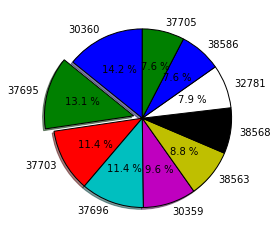

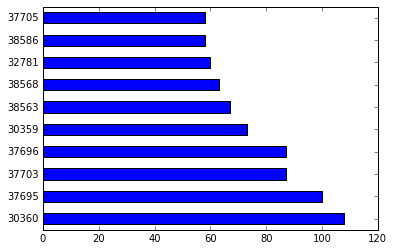

count     10.000000
mean      76.100000
std       18.272323
min       58.000000
25%       60.750000
50%       70.000000
75%       87.000000
max      108.000000
Name: count, dtype: float64

In [19]:
from pyspark import SparkContext,SparkConf
from operator import add
from pyspark.sql import SparkSession
from pyspark.sql import HiveContext
from pandas import *
spark = SparkSession \
    .builder \
    .appName("pyspark") \
    .config("spark.some.config.option", "some-value") \
    .enableHiveSupport()\
    .getOrCreate()
sc=spark.sparkContext

df = spark.sql("select * from yanbin.product")
df.show()

%matplotlib inline
from pyspark.sql.functions import *
dfPandas = df.groupBy("productid").count().sort(desc('count')).limit(10).toPandas()
dfPandas.index=list(dfPandas['productid'])
dfPandas.ix[:,1].plot(kind='bar')
import numpy as np
import matplotlib.pyplot as plt
labels = list(dfPandas['productid'])
fracs = list(dfPandas['count'])
explode = [0, 0.1, 0, 0,0,0,0,0,0,0]
plt.axes(aspect=1)
plt.pie(x=fracs, labels=labels, explode=explode,autopct='%3.1f %%',\
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
plt.show()

dfPandas.ix[:,1].plot(kind='barh')
plt.show()

spark.stop()
dfPandas.ix[:,1].describe()